# Pre-Liminary

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, KFold
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
# Models

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Default theme
sns.set_theme(context='notebook',
              style='whitegrid',
              palette='rainbow',
              font='Lucida Calligraphy',
              font_scale=1.5,
              rc=None)
import matplotlib
matplotlib.rcParams['figure.figsize'] = [8, 8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [ ]:
!pip install squarify

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read - Data Glass

Dataset "Glass":

Sumber Data:

Dataset "Glass" berasal dari Penyelidikan Identifikasi Jenis Kaca yang dilakukan oleh UCI Machine Learning Repository.
Deskripsi Umum:

Jumlah Sampel: 214
Jumlah Fitur: 10
Jenis Data: Numerik
Fitur Utama:

Refractive Index: Indeks biasa cahaya pada kaca.
Sodium (Na): Kandungan natrium dalam kaca.
Magnesium (Mg): Kandungan magnesium dalam kaca.
Aluminum (Al): Kandungan aluminium dalam kaca.
Silicon (Si): Kandungan silikon dalam kaca.
Potassium (K): Kandungan kalium dalam kaca.
Calcium (Ca): Kandungan kalsium dalam kaca.
Barium (Ba): Kandungan barium dalam kaca.
Iron (Fe): Kandungan besi dalam kaca.
Type of Glass: Jenis kaca yang diidentifikasi (label kelas).
Tujuan Penggunaan:

Dataset ini biasanya digunakan untuk tugas klasifikasi, di mana model machine learning dapat dipelajari untuk mengidentifikasi jenis kaca berdasarkan propertinya.
Contoh Aplikasi:

Klasifikasi jenis kaca untuk tujuan identifikasi bahan dan keamanan.
Tantangan:

Tantangan dalam dataset ini mungkin melibatkan klasifikasi yang akurat karena properti kaca yang dapat bervariasi dengan subtil.

## Data Set

In [ ]:
# Membaca dataset Yeast (gantilah path file jika diperlukan)
data = pd.read_csv('/content/drive/MyDrive/Data - Nuzula Afini/Data - Dataset/Titanic/train.csv')
data.head(3).style.set_properties(
    **{
        'background-color': 'LightBlue',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.250000,nan,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.000000,1,0,PC 17599,71.283300,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.925000,nan,S


In [ ]:
print('Shape of Glass data Train set is :',data.shape)
print('Size of Glass data Train set is  :',data.size)

Shape of Glass data Train set is : (891, 12)
Size of Glass data Train set is  : 10692


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
missing_data = data.isnull().sum()
print("Data yang Hilang Train :\n")
print(missing_data)

Data yang Hilang Train :

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# [PEMILIHAN-PROCESS-UNTUK-PEMBANDING-AKURASI](https://)

In [ ]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
data['Cabin'].isnull().sum()

687

In [ ]:
# fill missing value in 'Cabin' columns with something
data['Cabin'] = data.Cabin.fillna('Z')

# extract just the first later of cabin name
data['Cabin'] = data.Cabin.map(lambda cabin: cabin[0])

data.Cabin.value_counts()

Z    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [ ]:
data['Embarked'].isnull().sum()

2

In [ ]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# fill missing values in 'Embarked' column with the most values
data['Embarked'] = data.Embarked.fillna('S')

data.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
data.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
data['Age'].isnull().sum()

177

In [ ]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
# fill missing value 'Age' column with average ages to each class

Pclass1_ageMean = data.loc[data.Pclass == 1].Age.mean()
Pclass1_ageMean = data.loc[data.Pclass == 2].Age.mean()
Pclass1_ageMean = data.loc[data.Pclass == 3].Age.mean()

data.loc[data.Pclass == 1, 'Age'] = data.loc[data.Pclass == 1].Age.fillna(Pclass1_ageMean)
data.loc[data.Pclass == 2, 'Age'] = data.loc[data.Pclass == 2].Age.fillna(Pclass1_ageMean)
data.loc[data.Pclass == 3, 'Age'] = data.loc[data.Pclass == 3].Age.fillna(Pclass1_ageMean)

data['Age'].isnull().sum()

0

In [ ]:
data.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
data.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [ ]:
# combine to features 'SibSp' and 'Parch' to new column 'Relative'

data['Relative'] = data.SibSp + data.Parch
data['Relative'] = data.Relative.map(lambda x: 1 if(x > 0) else 0)

data = data.drop('SibSp', axis='columns')
data = data.drop('Parch', axis='columns')

data.Relative.value_counts()

0    537
1    354
Name: Relative, dtype: int64

In [ ]:
missing_data = data.isnull().sum()
print("Data yang Hilang data :\n")
print(missing_data)

Data yang Hilang data :

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Relative       0
dtype: int64


# Teknik Resampling Data and Split Data 1
## with SMOTE - Survived

In [ ]:
print('Shape of data Glass set is :',data.shape)
print('Size of data Glass set is  :',data.size)

Shape of data Glass set is : (891, 11)
Size of data Glass set is  : 9801


In [ ]:
from sklearn.utils import resample

In [ ]:
# Ganti nama kolom 'survived' menjadi 'label'
data.rename(columns={'Survived': 'label'}, inplace=True)

In [ ]:
label_value = data["label"].value_counts().head(50).to_frame()
label_value.index
label_value

,label
0,549
1,342


In [ ]:
data

,PassengerId,label,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,A/5 21171,7.2500,Z,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,PC 17599,71.2833,C,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,STON/O2. 3101282,7.9250,Z,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,113803,53.1000,C,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,373450,8.0500,Z,S,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,211536,13.0000,Z,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,112053,30.0000,B,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,W./C. 6607,23.4500,Z,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,111369,30.0000,C,C,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Name'] = le.fit_transform(data['Name'])
data['Sex'] = le.fit_transform(data['Sex'])
data['Ticket'] = le.fit_transform(data['Ticket'])
data['Cabin'] = le.fit_transform(data['Cabin'])
data['Embarked'] = le.fit_transform(data['Embarked'])
data

,PassengerId,label,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
0,1,0,3,108,1,22.00000,523,7.2500,8,2,1
1,2,1,1,190,0,38.00000,596,71.2833,2,0,1
2,3,1,3,353,0,26.00000,669,7.9250,8,2,0
3,4,1,1,272,0,35.00000,49,53.1000,2,2,1
4,5,0,3,15,1,35.00000,472,8.0500,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.00000,101,13.0000,8,2,0
887,888,1,1,303,0,19.00000,14,30.0000,1,2,0
888,889,0,3,413,0,25.14062,675,23.4500,8,2,1
889,890,1,1,81,1,26.00000,8,30.0000,2,0,0


In [ ]:
data['Age'] =  data['Age'].astype(int)
data['Fare'] = data['Fare'].astype(int)
data

,PassengerId,label,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
0,1,0,3,108,1,22,523,7,8,2,1
1,2,1,1,190,0,38,596,71,2,0,1
2,3,1,3,353,0,26,669,7,8,2,0
3,4,1,1,272,0,35,49,53,2,2,1
4,5,0,3,15,1,35,472,8,8,2,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27,101,13,8,2,0
887,888,1,1,303,0,19,14,30,1,2,0
888,889,0,3,413,0,25,675,23,8,2,1
889,890,1,1,81,1,26,8,30,2,0,0


In [ ]:
cek = pd.DataFrame({
    'Data Kosong': data.isnull().sum(),
    'Data Duplikat': data.duplicated().sum(),
    'Data NaNN': data.isna().sum(),
    'Type Data': data.dtypes
})

cek

,Data Kosong,Data Duplikat,Data NaNN,Type Data
PassengerId,0,0,0,int64
label,0,0,0,int64
Pclass,0,0,0,int64
Name,0,0,0,int64
Sex,0,0,0,int64
Age,0,0,0,int64
Ticket,0,0,0,int64
Fare,0,0,0,int64
Cabin,0,0,0,int64
Embarked,0,0,0,int64


In [ ]:
#create two different dataframe of majority and minority class
df_majority0 = data[data['label'] == 0]
df_minority1 = data[data['label'] == 1]

In [ ]:
# Menggunakan panjang df_majority sebagai acuan untuk n_samples
n_samples = len(df_majority0)
n_samples

549

In [ ]:
# upsample minority class
df_minority1_upsampled = resample(df_minority1,
                                 replace=True,    # sample with replacement
                                 n_samples= n_samples, # to match majority class
                                 random_state=42)  # reproducible result

In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority1_upsampled, df_majority0])

In [ ]:
df_upsampled.label.value_counts()

1    549
0    549
Name: label, dtype: int64

In [ ]:
df_upsampled.head(3)

,PassengerId,label,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
288,289,1,2,378,1,42,134,13,8,2,0
697,698,1,3,565,0,25,419,7,8,1,0
298,299,1,1,714,1,25,98,30,2,2,0


In [ ]:
# Menggunakan panjang df_majority sebagai acuan untuk n_samples
n_samples = len(df_upsampled)
n_samples

1098

In [ ]:
cek = pd.DataFrame({
    'Data Kosong': df_upsampled.isnull().sum(),
    'Data Duplikat': df_upsampled.duplicated().sum(),
    'Data NaNN': df_upsampled.isna().sum(),
    'Type Data': df_upsampled.dtypes
})

cek

,Data Kosong,Data Duplikat,Data NaNN,Type Data
PassengerId,0,279,0,int64
label,0,279,0,int64
Pclass,0,279,0,int64
Name,0,279,0,int64
Sex,0,279,0,int64
Age,0,279,0,int64
Ticket,0,279,0,int64
Fare,0,279,0,int64
Cabin,0,279,0,int64
Embarked,0,279,0,int64


In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Teknik SMOTE

In [ ]:
label_value = data["label"].value_counts().head(50).to_frame()
label_value.index
label_value

,label
0,549
1,342


In [ ]:
import numpy as np

# Calculate indices of the minority class
minority_class_indices = np.where(y_train == 1)[0]

# Calculate indices of the majority class
majority_class_indices = np.where(y_train == 0)[0]


In [ ]:
# Convert minority_class_indices to a DataFrame and select a random subset

if len(minority_class_indices) >= len(majority_class_indices):
    minority_subset_indices = minority_class_indices.to_frame().sample(n=len(majority_class_indices), random_state=42).squeeze()
else:
    minority_subset_indices = minority_class_indices


In [ ]:
# Combine indices from both majority and minority classes
subset_indices = np.concatenate((majority_class_indices, minority_class_indices))

In [ ]:
# Use these indices to create the subset
X_resampled = X_train.iloc[subset_indices]
y_resampled = y_train.iloc[subset_indices]

In [ ]:
# Apply SMOTE to the subset
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train, y_train = smote.fit_resample(X,y)

In [ ]:
# Menggabungkan fitur dan label yang telah diundersample menjadi DataFrame baru
undersampled_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
undersampled_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative,label
0,289,2,378,1,42,134,13,8,2,0,1
1,698,3,565,0,25,419,7,8,1,0,1
2,299,1,714,1,25,98,30,2,2,0,1


In [ ]:
label_value = undersampled_data["label"].value_counts().head(50).to_frame()
label_value.index
label_value

,label
1,549
0,549


# Split Data - Data Trains

In [ ]:
# Memisahkan fitur dan label
X = df_upsampled.drop('label', axis=1)
X.head(3)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
288,289,2,378,1,42,134,13,8,2,0
697,698,3,565,0,25,419,7,8,1,0
298,299,1,714,1,25,98,30,2,2,0


In [ ]:
y = df_upsampled['label']
y

288    1
697    1
298    1
208    1
483    1
      ..
884    0
885    0
886    0
888    0
890    0
Name: label, Length: 1098, dtype: int64

In [ ]:
# Memisahkan fitur dan label
X = undersampled_data.drop('label', axis=1)
X.head(3)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
0,289,2,378,1,42,134,13,8,2,0
1,698,3,565,0,25,419,7,8,1,0
2,299,1,714,1,25,98,30,2,2,0


In [ ]:
y = undersampled_data['label']
y

0       1
1       1
2       1
3       1
4       1
       ..
1093    0
1094    0
1095    0
1096    0
1097    0
Name: label, Length: 1098, dtype: int64

In [ ]:
label_value = df_upsampled["label"].value_counts().head(50).to_frame()
label_value.index
label_value

,label
1,549
0,549


# Label - Survived

In [ ]:
label_value = data["label"].value_counts().head(50).to_frame()
label_value.index
label_value

,label
0,549
1,342


In [ ]:
df_upsampled.corr()

,PassengerId,label,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
PassengerId,1.000000,0.005116,-0.056015,-0.035419,0.048842,0.043062,-0.075527,0.018725,-0.064823,-0.024815,-0.037640
label,0.005116,1.000000,-0.339791,-0.087471,-0.528324,-0.047610,-0.162631,0.269846,-0.308674,-0.168462,0.194124
Pclass,-0.056015,-0.339791,1.000000,0.102572,0.154714,-0.327274,0.370679,-0.583417,0.767181,0.173788,-0.183986
Name,-0.035419,-0.087471,0.102572,1.000000,0.018078,0.030290,0.058186,-0.099540,0.106116,-0.000744,-0.110752
Sex,0.048842,-0.528324,0.154714,0.018078,1.000000,0.089383,0.052771,-0.223230,0.150838,0.114933,-0.273833
Age,0.043062,-0.047610,-0.327274,0.030290,0.089383,1.000000,-0.074435,0.122860,-0.241447,0.004248,-0.121173
Ticket,-0.075527,-0.162631,0.370679,0.058186,0.052771,-0.074435,1.000000,-0.051626,0.299604,0.017204,-0.088783
Fare,0.018725,0.269846,-0.583417,-0.099540,-0.223230,0.122860,-0.051626,1.000000,-0.555410,-0.246135,0.283094
Cabin,-0.064823,-0.308674,0.767181,0.106116,0.150838,-0.241447,0.299604,-0.555410,1.000000,0.211018,-0.203949
Embarked,-0.024815,-0.168462,0.173788,-0.000744,0.114933,0.004248,0.017204,-0.246135,0.211018,1.000000,-0.041281


# [JALANKAN-AKURASI](https://)

# PILIH 1 diantara 2 cara Train_Split_Data :
## Sampling Data Label with Statisfield Sampling or Random Sampling

In [ ]:
# Inisialisasi metode cross-validation
kf_stratified = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Eksperimen dengan stratified sampling
for train_index, test_index in kf_stratified.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
print('Shape of Titanic data X Train set is :',X_train.shape)
print('Size of Titanic data Y Train set is  :',y_train.size)

print('Shape of Titanic data X Test set is :',X_test.shape)
print('Size of Titanic data Y Test set is  :',y_test.size)

Shape of Titanic data X Train set is : (879, 10)
Size of Titanic data Y Train set is  : 879
Shape of Titanic data X Test set is : (219, 10)
Size of Titanic data Y Test set is  : 219


In [ ]:
label_value = y_train.value_counts().head(50).to_frame()
label_value.index
label_value

,label
1,440
0,439


In [ ]:
label_value = y_test.value_counts().head(50).to_frame()
label_value.index
label_value

,label
0,110
1,109


# Nilai X Train, Y Train, X Test, dan Y Test

In [ ]:
X_train.head(3)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
0,289,2,378,1,42,134,13,8,2,0
1,698,3,565,0,25,419,7,8,1,0
3,209,3,140,0,16,445,7,8,1,0


In [ ]:
y_train.head(3)

0    1
1    1
3    1
Name: label, dtype: int64

In [ ]:
X_test.head(3)

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Relative
2,299,1,714,1,25,98,30,2,2,0
4,484,3,825,0,63,489,9,8,2,0
5,45,3,212,0,19,282,7,8,1,0


In [ ]:
y_test.head(3)

2    1
4    1
5    1
Name: label, dtype: int64

In [ ]:
print('Shape of Titanic data X Train set is :',X_train.shape)
print('Size of Titanic data Y Train set is  :',y_train.size)
print('Shape of Titanic data X Test set is :',X_test.shape)
print('Size of Titanic data Y Test set is  :',y_test.size)

Shape of Titanic data X Train set is : (879, 10)
Size of Titanic data Y Train set is  : 879
Shape of Titanic data X Test set is : (219, 10)
Size of Titanic data Y Test set is  : 219


# Percobaan Voting Data Resampling - Model General ALL

## LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1, solver='lbfgs', multi_class='auto', max_iter=10000)
logreg.fit(X_train, y_train)
logreg

LogisticRegression(C=1, max_iter=10000)

In [ ]:
y_pred_train_log = logreg.predict(X_train)
print("Predict Train : \n ", y_pred_train_log)

y_pred_test_log = logreg.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_log)

Predict Train : 
  [0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 1 1 0 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 1
 1 0 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0

In [ ]:
# Train-test split pada data training
log_train = round(accuracy_score(y_train, y_pred_train_log)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {log_train:.2f}')

# Train-test split pada data testing
log_test  = round(accuracy_score(y_test, y_pred_test_log)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {log_test:.2f}')


 Accuracy (Train-Test Split - Training): 76.45

 Accuracy (Train-Test Split - Testing): 81.28


In [ ]:
log_test

81.28

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Support Vector Machines
svc = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True)
svc.fit(X_train, y_train)

SVC(probability=True)

In [ ]:
y_pred_train_svc = svc.predict(X_train)
print("Predict Train : \n ", y_pred_train_svc)

y_pred_test_svc = svc.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_svc)

Predict Train : 
  [1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1 1
 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0
 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0
 0 1 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0
 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1
 0 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0 1 1 0
 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0
 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 1
 1 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0

In [ ]:
# Train-test split pada data training
svc_train = round(accuracy_score(y_train, y_pred_train_svc)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {svc_train:.2f}')

# Train-test split pada data testing
svc_test  = round(accuracy_score(y_test, y_pred_test_svc)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {svc_test:.2f}')


 Accuracy (Train-Test Split - Training): 64.62

 Accuracy (Train-Test Split - Testing): 61.64


In [ ]:
svc_test

61.64

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred_train_knn = knn.predict(X_train)
print("Predict Train : \n ", y_pred_train_knn)

y_pred_test_knn = knn.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_knn)

Predict Train : 
  [1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0
 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 0
 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0
 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1
 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 0 1 1 1 1 1 0
 1 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1
 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 1 0

In [ ]:
# Train-test split pada data training
knn_train = round(accuracy_score(y_train, y_pred_train_knn)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {knn_train:.2f}')

# Train-test split pada data testing
knn_test  = round(accuracy_score(y_test, y_pred_test_knn)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {knn_test:.2f}')


 Accuracy (Train-Test Split - Training): 72.81

 Accuracy (Train-Test Split - Testing): 64.84


In [ ]:
knn_test

64.84

## GaussianNB

In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB(var_smoothing=1e-9)
gaussian.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_train_gaussian = gaussian.predict(X_train)
print("Predict Train : \n ", y_pred_train_gaussian)

y_pred_test_gaussian = gaussian.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_gaussian)

Predict Train : 
  [0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 0
 0 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1
 1 0 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 1
 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1
 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 1
 1 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0

In [ ]:
# Train-test split pada data training
gaussian_train = round(accuracy_score(y_train, y_pred_train_gaussian)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {gaussian_train:.2f}')

# Train-test split pada data testing
gaussian_test  = round(accuracy_score(y_test, y_pred_test_gaussian)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {gaussian_test:.2f}')


 Accuracy (Train-Test Split - Training): 72.24

 Accuracy (Train-Test Split - Testing): 73.52


In [ ]:
gaussian_test

73.52

## Perceptron

In [ ]:
# Perceptron

from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

Perceptron()

In [ ]:
y_pred_train_perceptron = perceptron.predict(X_train)
print("Predict Train : \n ", y_pred_train_perceptron)

y_pred_test_perceptron = perceptron.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_perceptron)

Predict Train : 
  [1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1 0 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0

In [ ]:
# Train-test split pada data training
perceptron_train = round(accuracy_score(y_train, y_pred_train_perceptron)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {perceptron_train:.2f}')

# Train-test split pada data testing
perceptron_test  = round(accuracy_score(y_test, y_pred_test_perceptron)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {perceptron_test:.2f}')


 Accuracy (Train-Test Split - Training): 51.76

 Accuracy (Train-Test Split - Testing): 51.14


In [ ]:
perceptron_test

51.14

## LinearSVC

In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(C=1.0, max_iter=1000)
linear_svc.fit(X_train, y_train)

LinearSVC()

In [ ]:
y_pred_train_linear_svc = linear_svc.predict(X_train)
print("Predict Train : \n ", y_pred_train_linear_svc)

y_pred_test_linear_svc = linear_svc.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_linear_svc)

Predict Train : 
  [0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 0 1 0 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1
 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1
 1 1 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 1

In [ ]:
# Train-test split pada data training
linear_svc_train = round(accuracy_score(y_train, y_pred_train_linear_svc)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {linear_svc_train:.2f}')

# Train-test split pada data testing
linear_svc_test  = round(accuracy_score(y_test, y_pred_test_linear_svc)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {linear_svc_test:.2f}')


 Accuracy (Train-Test Split - Training): 60.64

 Accuracy (Train-Test Split - Testing): 70.78


In [ ]:
linear_svc_test

70.78

## SGDClassifier

In [ ]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)

SGDClassifier()

In [ ]:
y_pred_train_sgd = sgd.predict(X_train)
print("Predict Train : \n ", y_pred_train_sgd)

y_pred_test_sgd = sgd.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_sgd)

Predict Train : 
  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0
 0 1 1

In [ ]:
# Train-test split pada data training
sgd_train = round(accuracy_score(y_train, y_pred_train_sgd)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {sgd_train:.2f}')

# Train-test split pada data testing
sgd_test  = round(accuracy_score(y_test, y_pred_test_sgd)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {sgd_test:.2f}')


 Accuracy (Train-Test Split - Training): 50.63

 Accuracy (Train-Test Split - Testing): 48.86


In [ ]:
sgd_test

48.86

## DecisionTreeClassifier

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(max_depth=5)
decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred_train_decision = decision.predict(X_train)
print("Predict Train : \n ", y_pred_train_decision)

y_pred_test_decision = decision.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_decision)

Predict Train : 
  [0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0

In [ ]:
# Train-test split pada data training
decision_train = round(accuracy_score(y_train, y_pred_train_decision)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {decision_train:.2f}')

# Train-test split pada data testing
decision_test  = round(accuracy_score(y_test, y_pred_test_decision)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {decision_test:.2f}')


 Accuracy (Train-Test Split - Training): 85.67

 Accuracy (Train-Test Split - Testing): 84.02


In [ ]:
decision_test

84.02

## RandomForestClassifier

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_train_random_forest = random_forest.predict(X_train)
print("Predict Train : \n ", y_pred_train_random_forest)

y_pred_test_random_forest= random_forest.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_random_forest)

Predict Train : 
  [0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1
 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0

In [ ]:
# Train-test split pada data training
random_forest_train = round(accuracy_score(y_train, y_pred_train_random_forest)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {random_forest_train:.2f}')

# Train-test split pada data testing
random_forest_test  = round(accuracy_score(y_test, y_pred_test_random_forest)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {random_forest_test:.2f}')


 Accuracy (Train-Test Split - Training): 86.80

 Accuracy (Train-Test Split - Testing): 84.93


In [ ]:
random_forest_test

84.93

## MLPClassifier

In [ ]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)

In [ ]:
y_pred_train_mlp = mlp.predict(X_train)
print("Predict Train : \n ", y_pred_train_mlp)

y_pred_test_mlp = mlp.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_mlp)

Predict Train : 
  [0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 0
 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 1
 1 1 0

In [ ]:
# Train-test split pada data training
mlp_train = round(accuracy_score(y_train, y_pred_train_mlp)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {mlp_train:.2f}')

# Train-test split pada data testing
mlp_test  = round(accuracy_score(y_test, y_pred_test_mlp)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {mlp_test:.2f}')


 Accuracy (Train-Test Split - Training): 75.31

 Accuracy (Train-Test Split - Testing): 74.43


In [ ]:
mlp_test

74.43

## XGBClassifier

In [ ]:
# Mengatasi missing values
df_upsampled.fillna(0, inplace=True)  # Gantilah 0 dengan nilai yang sesuai sesuai kebutuhan

In [ ]:
import xgboost as Xgb
xgb = Xgb.XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=3, objective='multi:softmax', num_class=3)
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [ ]:
y_pred_train_xgb = xgb.predict(X_train)
print("\n Predict Train : \n ", y_pred_train_xgb)

y_pred_test_xgb = xgb.predict(X_test)
print("\n Predict Test : \n ", y_pred_test_xgb)


 Predict Train : 
  [0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0

In [ ]:
from sklearn.metrics import accuracy_score

# Train-test split pada data training
xgb_train = round(accuracy_score(y_train, y_pred_train_xgb)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Training): {xgb_train:.2f}')

# Train-test split pada data testing
xgb_test  = round(accuracy_score(y_test, y_pred_test_xgb)* 100, 2)
print(f'\n Accuracy (Train-Test Split - Testing): {xgb_test:.2f}')


 Accuracy (Train-Test Split - Training): 91.24

 Accuracy (Train-Test Split - Testing): 86.76


In [ ]:
xgb_test

86.76

# Comparing Models

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'KNN', 'Logistic Regression',
        'Random Forest',  'Perceptron',
        'Stochastic Gradient Decent', 'Linear SVC', 'Decision Tree',
        'GaussianNB', 'MLPClassifier', 'XGBClassifier'
    ],
    'Training Accuracy': [
        log_train, svc_train, knn_train, gaussian_train, perceptron_train,
        linear_svc_train, sgd_train, decision_train, random_forest_train,
        mlp_train, xgb_train
    ],
    'Test Accuracy': [
        log_test, svc_test, knn_test, gaussian_test, perceptron_test,
        linear_svc_test, sgd_test, decision_test, random_forest_test,
        mlp_test, xgb_test
    ]
})

In [ ]:
models.sort_values(by='Training Accuracy', ascending=False)

,Model,Training Accuracy,Test Accuracy
10,XGBClassifier,91.24,86.76
8,GaussianNB,86.80,84.93
7,Decision Tree,85.67,84.02
0,Support Vector Machines,76.45,81.28
9,MLPClassifier,75.31,74.43
2,Logistic Regression,72.81,64.84
3,Random Forest,72.24,73.52
1,KNN,64.62,61.64
5,Stochastic Gradient Decent,60.64,70.78
4,Perceptron,51.76,51.14


In [ ]:
models.sort_values(by='Test Accuracy', ascending=False).style.background_gradient(
        cmap='coolwarm').hide_index().set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

Model,Training Accuracy,Test Accuracy
XGBClassifier,91.240000,86.760000
GaussianNB,86.800000,84.930000
Decision Tree,85.670000,84.020000
Support Vector Machines,76.450000,81.280000
MLPClassifier,75.310000,74.430000
Random Forest,72.240000,73.520000
Stochastic Gradient Decent,60.640000,70.780000
Logistic Regression,72.810000,64.840000
KNN,64.620000,61.640000
Perceptron,51.760000,51.140000


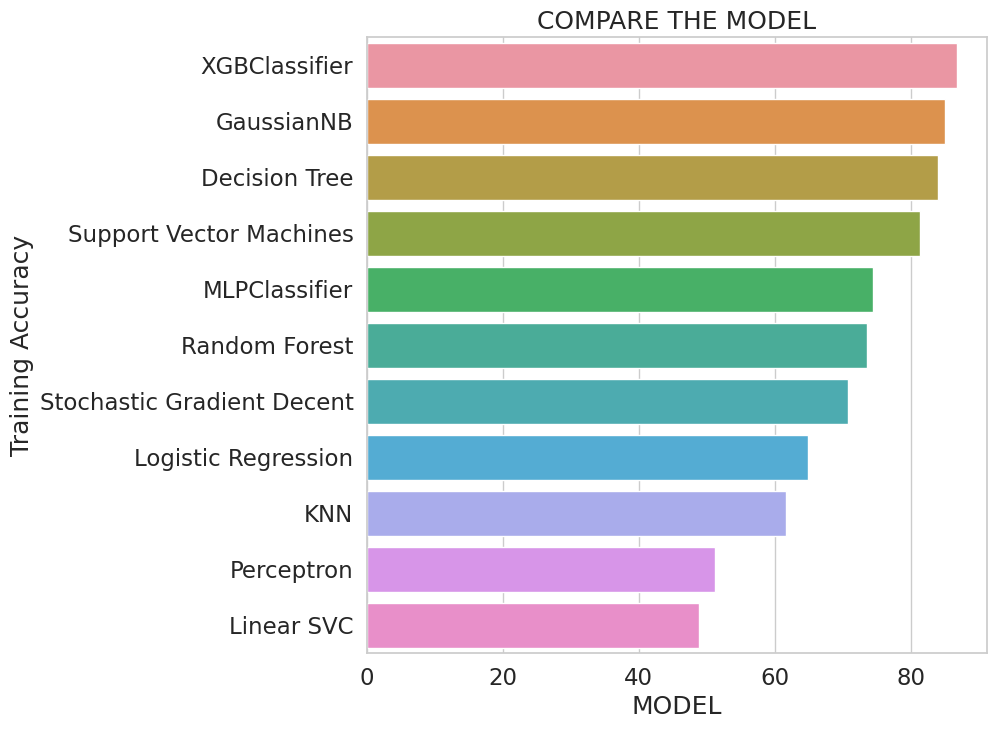

In [ ]:
models=models.sort_values(by='Test Accuracy',ascending=False)[:20]

sns.barplot(y= 'Model', x= 'Test Accuracy', data= models)
plt.title('COMPARE THE MODEL')
plt.xlabel('MODEL')
plt.ylabel('Training Accuracy');

# [SIMPAN-AKURASI](https://)

## Random Sampling dan SMOTE

In [ ]:
model_accuracies_1, model_accuracies_2, model_accuracies_3, model_accuracies_4, model_accuracies_5 = [],[],[],[],[]

In [ ]:
model_accuracies_1.append(models)

In [ ]:
model_accuracies_1

[                         Model  Training Accuracy  Test Accuracy
 10               XGBClassifier              91.24          86.76
 8                   GaussianNB              86.80          84.93
 7                Decision Tree              85.67          84.02
 0      Support Vector Machines              76.45          81.28
 3                Random Forest              72.24          73.52
 9                MLPClassifier              73.72          68.04
 5   Stochastic Gradient Decent              62.80          67.12
 2          Logistic Regression              72.81          64.84
 1                          KNN              64.62          61.64
 4                   Perceptron              51.76          51.14
 6                   Linear SVC              50.40          50.23]

In [ ]:
model_accuracies_2.append(models)

In [ ]:
model_accuracies_2

[                         Model  Training Accuracy  Test Accuracy
 10               XGBClassifier              91.24          86.76
 8                   GaussianNB              86.80          84.93
 7                Decision Tree              85.67          84.02
 0      Support Vector Machines              76.45          81.28
 9                MLPClassifier              75.31          74.43
 3                Random Forest              72.24          73.52
 5   Stochastic Gradient Decent              60.64          70.78
 2          Logistic Regression              72.81          64.84
 1                          KNN              64.62          61.64
 4                   Perceptron              51.76          51.14
 6                   Linear SVC              50.63          48.86]

In [ ]:
model_accuracies_3.append(models)

In [ ]:
model_accuracies_3

[                         Model  Training Accuracy  Test Accuracy
 8                   GaussianNB              96.16          91.21
 7                Decision Tree              92.88          89.01
 2          Logistic Regression              81.64          75.82
 0      Support Vector Machines              69.86          69.23
 9                MLPClassifier              73.42          67.03
 5   Stochastic Gradient Decent              53.42          51.65
 3                Random Forest              64.66          50.55
 1                          KNN              50.41          47.25
 6                   Linear SVC              36.71          36.26
 4                   Perceptron              16.71          16.48
 10               XGBClassifier               0.00           1.10,
                          Model  Training Accuracy  Test Accuracy
 8                   GaussianNB              96.16          91.21
 7                Decision Tree              92.88          90.11
 2       

In [ ]:
model_accuracies_4.append(models)

In [ ]:
model_accuracies_4

[                         Model  Training Accuracy  Test Accuracy
 8                   GaussianNB              96.16          91.21
 7                Decision Tree              92.88          90.11
 2          Logistic Regression              81.64          75.82
 0      Support Vector Machines              69.86          69.23
 9                MLPClassifier              75.34          68.13
 5   Stochastic Gradient Decent              59.45          53.85
 3                Random Forest              64.66          50.55
 1                          KNN              50.41          47.25
 6                   Linear SVC              18.08          18.68
 4                   Perceptron              16.71          16.48
 10               XGBClassifier               0.00           1.10,
                          Model  Training Accuracy  Test Accuracy
 8                   GaussianNB              96.16          91.21
 7                Decision Tree              92.88          89.01
 2       

In [ ]:
model_accuracies_5.append(models)

In [ ]:
model_accuracies_5

[                         Model  Training Accuracy  Test Accuracy
 8                   GaussianNB              96.16          91.21
 7                Decision Tree              92.88          90.11
 2          Logistic Regression              81.64          75.82
 0      Support Vector Machines              69.86          69.23
 9                MLPClassifier              69.04          67.03
 5   Stochastic Gradient Decent              51.78          52.75
 3                Random Forest              64.66          50.55
 1                          KNN              50.41          47.25
 6                   Linear SVC              23.01          23.08
 4                   Perceptron              16.71          16.48
 10               XGBClassifier               0.00           1.10]

# [VOTING dan STACKING](https://)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import VotingClassifier, StackingClassifier

In [ ]:
Logistik = logreg
SVC      = SVC(probability=True)
KNN      = knn
Gaussian      = gaussian
Perceptron    = perceptron
LinearSVC     = linear_svc
SGD           = sgd
DecisionTree  = decision
RandomForest  = random_forest
MultiLayer    = mlp
XGB           = xgb

In [ ]:
# Gunakan StratifiedKFold untuk memastikan distribusi label yang seimbang
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
# Lakukan Cross Validation
for train_idx, test_idx in kfold.split(X, y):
    X_train, X_test = X.iloc[train_idx].values, X.iloc[test_idx].values
    y_train, y_test = y.iloc[train_idx].values, y.iloc[test_idx].values

In [ ]:
# Inisialisasi list untuk menyimpan hasil evaluasi setiap fold
voting_accuracies_trains, voting_accuracies_tests, accuracy_votings, voting_precisions, voting_recalls = [], [], [], [], []
stacking_accuracies_trains, stacking_accuracies_tests, accuracy_stackings, stacking_precisions, stacking_recalls = [], [], [], [], []

# Percobaan Voting Data Resampling

In [ ]:
voting = VotingClassifier(estimators=[  ('Log', Logistik),('SVC', SVC), ('KNN', KNN),
                                        ('GAU', Gaussian),('PERC', Perceptron), ('LSVC', LinearSVC),
                                        ('DT', DecisionTree),('MLP', MultiLayer),
                                        ('LinSVC', LinearSVC),('RDF', RandomForest),('XGB', XGB)
], voting='hard')

In [ ]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('Log', LogisticRegression(C=1, max_iter=10000)),
                             ('SVC', SVC(probability=True)),
                             ('KNN', KNeighborsClassifier(n_neighbors=10)),
                             ('GAU', GaussianNB()), ('PERC', Perceptron()),
                             ('LSVC', LinearSVC()),
                             ('DT', DecisionTreeClassifier(max_depth=5)),
                             ('MLP',
                              MLPClassifier(hidden_layer_sizes=(100, 50),
                                            max_iter=1000)),
                             ('LinSVC', LinearSVC()),
                             ('RD...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_class=3, num_parallel_tree=None, ...))])

In [ ]:
# accuracy train set
voting_train_pred = voting.predict(X_train)
voting_accuracies_train = accuracy_score(y_train, voting_train_pred)
voting_accuracies_train

0.8321536905965622

In [ ]:
# accuracy test set
voting_test_pred = voting.predict(X_test)
voting_accuracies_test = accuracy_score(y_test, voting_test_pred)
voting_accuracies_test

0.8256880733944955

In [ ]:
# Dapatkan prediksi menggunakan cross_val_predict
y_pred_voting = cross_val_predict(voting, X, y, cv=kfold)
y_pred_voting

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluasi prediksi, misalnya menggunakan akurasi
accuracy_voting = accuracy_score(y, y_pred_voting)
print("Accuracy: %.2f%%" % (accuracy_voting * 100))

Accuracy: 76.59%


In [ ]:
voting_train_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [ ]:
voting_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# Evaluasi untuk Voting Classifier - Precission
voting_precision = precision_score(y_test, voting_test_pred, average='weighted')  # Specify 'micro', 'macro', or 'weighted'
voting_precision

0.8267652193291981

In [ ]:
# Evaluasi untuk Voting Classifier - Recall
voting_recall = recall_score(y_test, voting_test_pred, average='weighted')  # Specify 'micro', 'macro', or 'weighted'
voting_recall

0.8256880733944955

In [ ]:
# Menyimpan hasil evaluasi Voting Classifier
voting_accuracies_trains.append(voting_accuracies_train)
voting_accuracies_tests.append(voting_accuracies_test)
accuracy_votings.append(accuracy_voting)
voting_precisions.append(voting_precision)
voting_recalls.append(voting_recall)

# Percobaan Stacking Data Resampling

In [ ]:
# Initialize meta-classifier (logistic regression)
meta_classifier = Gaussian

In [ ]:
# Create Stacking Classifier
stacking = StackingClassifier(estimators=[  ('Log', Logistik),('SVC', SVC), ('KNN', KNN),
                                        ('GAU', Gaussian),('PERC', Perceptron), ('LSVC', LinearSVC),
                                        ('DT', DecisionTree),('MLP', MultiLayer),
                                        ('LinSVC', LinearSVC),('RDF', RandomForest),('XGB', XGB)

],final_estimator=meta_classifier, stack_method='auto')


In [ ]:
stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('Log', LogisticRegression(C=1, max_iter=10000)),
                               ('SVC', SVC(probability=True)),
                               ('KNN', KNeighborsClassifier(n_neighbors=10)),
                               ('GAU', GaussianNB()), ('PERC', Perceptron()),
                               ('LSVC', LinearSVC()),
                               ('DT', DecisionTreeClassifier(max_depth=5)),
                               ('MLP',
                                MLPClassifier(hidden_layer_sizes=(100, 50),
                                              max_iter=1000)),
                               ('LinSVC', LinearSVC()),
                               ('...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=3,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_class=3,
                                              num_parallel_tree=None, ...))],
                   final_estimator=GaussianNB())

In [ ]:
# accuracy train set
stacking_train_pred = stacking.predict(X_train)
stacking_accuracies_train = accuracy_score(y_train, stacking_train_pred)
stacking_accuracies_train

0.596562184024267

In [ ]:
# accuracy test set
stacking_test_pred = stacking.predict(X_test)
stacking_accuracies_test = accuracy_score(y_test, stacking_test_pred)
stacking_accuracies_test

0.5963302752293578

In [ ]:
# Dapatkan prediksi menggunakan cross_val_predict
y_pred_stacking = cross_val_predict(voting, X, y, cv=kfold)
y_pred_stacking

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# Evaluasi prediksi, misalnya menggunakan akurasi
accuracy_stacking = accuracy_score(y, y_pred_stacking)
print("Accuracy: %.2f%%" % (accuracy_stacking* 100))

Accuracy: 78.87%


In [ ]:
voting_train_pred

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,

In [ ]:
voting_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

In [ ]:
# Evaluasi untuk Stacking Classifier - Precission
stacking_precision = precision_score(y_test, stacking_test_pred, average='weighted')  # Specify 'micro', 'macro', or 'weighted'
stacking_precision

0.5979004818254917

In [ ]:
# Evaluasi untuk Stacking Classifier - Recal
stacking_recall = recall_score(y_test, stacking_test_pred, average='weighted')  # Specify 'micro', 'macro', or 'weighted'
stacking_recall

0.5963302752293578

In [ ]:
# Menyimpan hasil evaluasi Stacking Classifier
stacking_accuracies_trains.append(stacking_accuracies_train)
stacking_accuracies_tests.append(stacking_accuracies_test)
accuracy_stackings.append(accuracy_stacking)
stacking_precisions.append(stacking_precision)
stacking_recalls.append(stacking_recall)

# Hasil

In [ ]:
voting_accuracies_trains

[0.8321536905965622]

In [ ]:
voting_accuracies_tests

[0.8256880733944955]

In [ ]:
accuracy_votings

[0.7659380692167578]

In [ ]:
voting_precisions

[0.8267652193291981]

In [ ]:
voting_recalls

[0.8256880733944955]

In [ ]:
stacking_accuracies_trains

[0.596562184024267]

In [ ]:
stacking_accuracies_tests

[0.5963302752293578]

In [ ]:
accuracy_stackings

[0.7887067395264117]

In [ ]:
stacking_precisions

[0.5979004818254917]

In [ ]:
stacking_recalls

[0.5963302752293578]

In [ ]:
# Menampilkan hasil rata-rata dari evaluasi setiap fold

print("Voting Classifier:")
print("  - Accuracy Train : %.2f%%" % (sum(voting_accuracies_trains) / len(voting_accuracies_trains) * 100))
print("  - Accuracy Test: %.2f%%" % (sum(voting_accuracies_tests) / len(voting_accuracies_trains) * 100))
print("  - Accuracy Voting: %.2f%%" % (sum(accuracy_votings) / len(accuracy_votings) * 100))
print("  - Precision: %.2f" % (sum(voting_precisions) / len(voting_precisions) * 100))
print("  - Recall: %.2f" % (sum(voting_recalls) / len(voting_recalls) * 100))

print("Stacking Classifier:")
print("  - Accuracy Train : %.2f%%" % (sum(stacking_accuracies_trains) / len(stacking_accuracies_trains) * 100))
print("  - Accuracy Test : %.2f%%" % (sum(stacking_accuracies_tests) / len(stacking_accuracies_tests) * 100))
print("  - Accuracy Stacking: %.2f%%" % (sum(accuracy_stackings) / len(accuracy_stackings) * 100))
print("  - Precision: %.2f" % (sum(stacking_precisions) / len(stacking_precisions) * 100))
print("  - Recall: %.2f" % (sum(stacking_recalls) / len(stacking_recalls) * 100))


Voting Classifier:
  - Accuracy Train : 83.22%
  - Accuracy Test: 82.57%
  - Accuracy Voting: 76.59%
  - Precision: 82.68
  - Recall: 82.57
Stacking Classifier:
  - Accuracy Train : 59.66%
  - Accuracy Test : 59.63%
  - Accuracy Stacking: 78.87%
  - Precision: 59.79
  - Recall: 59.63
